In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-open-policing-project/police_project.csv


In [19]:
data = pd.read_csv("/kaggle/input/stanford-open-policing-project/police_project.csv")

In [20]:
data.shape

(91741, 15)

In [21]:
data.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [22]:
data.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [23]:
data["violation"].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [24]:
data["violation_raw"].unique()

array(['Speeding', 'Call for Service', 'Equipment/Inspection Violation',
       'Other Traffic Violation', nan, 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Violation of City/Town Ordinance', 'Suspicious Person',
       'Motorist Assist/Courtesy', 'Warrant', 'Seatbelt Violation'],
      dtype=object)

In [25]:
print(data["driver_gender"].unique())
len(data["driver_gender"].unique())

['M' 'F' nan]


3

In [26]:
print(data["driver_race"].unique())
len(data["driver_race"].unique())

['White' 'Black' 'Asian' nan 'Hispanic' 'Other']


6

In [27]:
data = data.fillna(value=0)

In [28]:
data['stop_date'] = pd.to_datetime(data['stop_date'])

min_date = data['stop_date'].min()
print("Minimum date: ", min_date)
max_date = data['stop_date'].max()
print("Maximum date: ", max_date)
date_range = max_date - min_date
print("Date range: ", date_range)

Minimum date:  2005-01-02 00:00:00
Maximum date:  2015-12-31 00:00:00
Date range:  4015 days 00:00:00


In [49]:
data['age_break_down'] = pd.cut(data['driver_age'], bin_edges, labels=bin_labels)
data.groupby(data['age_break_down']).size()

age_break_down
Less than 18      635
18 - 25         28249
26 - 30         14141
31 - 35         10036
36 - 40          8082
41 - 45          7418
46 - 50          6344
51 - 55          4942
56 - 60          3215
61 - 65          1737
66 - 70           784
71 - 75           373
over 76           164
dtype: int64

In [29]:
# bin_edges = [0, 17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 76, 110]
# bin_labels = ['Less than 18', '18 - 25', '26 - 30', '31 - 35', '36 - 40','41 - 45', '46 - 50', 
#               '51 - 55', '56 - 60', '61 - 65', '66 - 70', '71 - 75', 'over 76']
# data['age_break_down'] = pd.cut(data['driver_age'], bin_edges, labels=bin_labels)
# data.groupby(data['age_break_down']).size()

age_break_down
Less than 18      635
18 - 25         28249
26 - 30         14141
31 - 35         10036
36 - 40          8082
41 - 45          7418
46 - 50          6344
51 - 55          4942
56 - 60          3215
61 - 65          1737
66 - 70           784
71 - 75           373
over 76           164
dtype: int64

In [18]:
data

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,0.0,M,1985.0,18 - 25,White,Speeding,Speeding,False,0,Citation,False,0-15 Min,False
1,2005-01-18,08:15,0.0,M,1965.0,36 - 40,White,Speeding,Speeding,False,0,Citation,False,0-15 Min,False
2,2005-01-23,23:15,0.0,M,1972.0,31 - 35,White,Speeding,Speeding,False,0,Citation,False,0-15 Min,False
3,2005-02-20,17:15,0.0,M,1986.0,18 - 25,White,Call for Service,Other,False,0,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,0.0,F,1984.0,18 - 25,White,Speeding,Speeding,False,0,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,0.0,M,1986.0,26 - 30,White,Speeding,Speeding,False,0,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,0.0,F,1982.0,31 - 35,White,Equipment/Inspection Violation,Equipment,False,0,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,0.0,M,1992.0,18 - 25,White,Other Traffic Violation,Moving violation,False,0,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,0.0,M,1993.0,18 - 25,White,Speeding,Speeding,False,0,Citation,False,0-15 Min,False


In [31]:
counts = data['stop_outcome'].value_counts().head(3)
counts

Citation    77006
0            5333
Warning      5294
Name: stop_outcome, dtype: int64

{'White': 62158, 'Black': 12244, 'Hispanic': 9507}


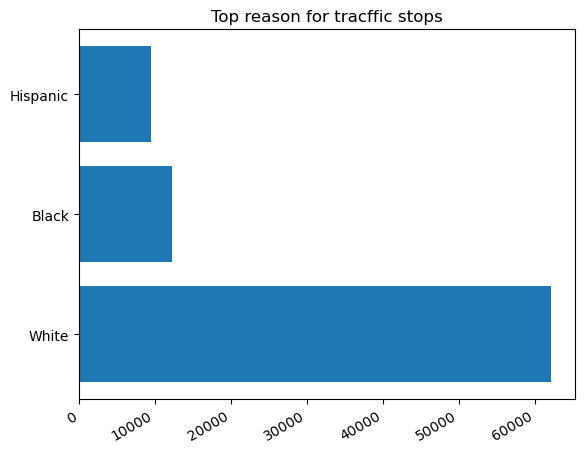

In [32]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

counts = data['driver_race'].value_counts().head(3)
dictionary = dict(counts)

print(dictionary)
items = []
values = []

for _ in range(len(counts)):
    for item in dictionary:
        value = dictionary[item]
        items.append(item)
        values.append(value)

fig, ax = plt.subplots()
ax.barh(items, values)

labels = ax.get_xticklabels()
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))


ax.set_title('Top reason for tracffic stops')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()


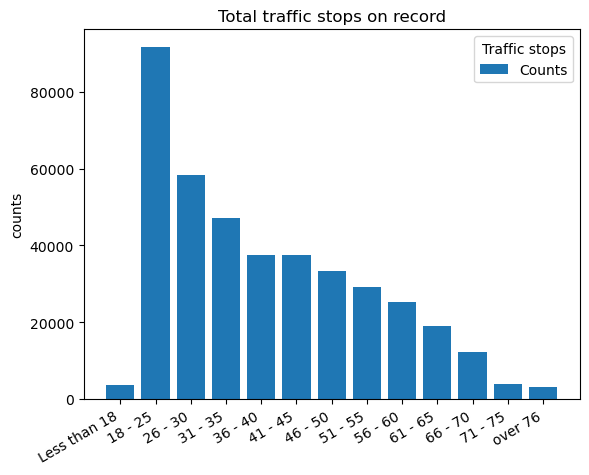

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.bar(bar_labels, counts, label='Counts')
plt.xticks(ha='center', va='top', rotation=45)

ax.set_ylabel('counts')
ax.set_title('Total traffic stops on record')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend(title='Traffic stops')

plt.show()

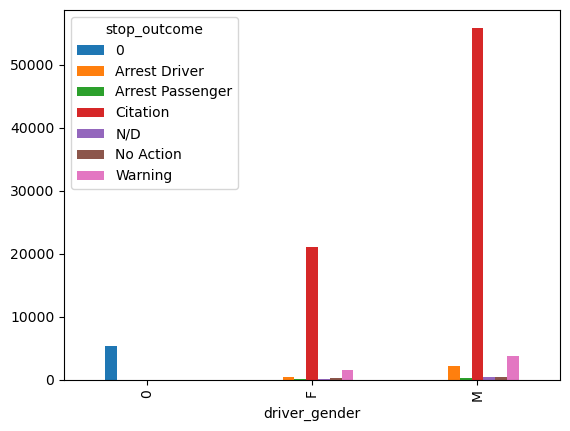

In [42]:
most_common_outcome = data.groupby(['driver_gender', 'stop_outcome']).size().unstack().fillna(0).plot(kind="bar")


<Axes: xlabel='driver_gender,stop_outcome'>

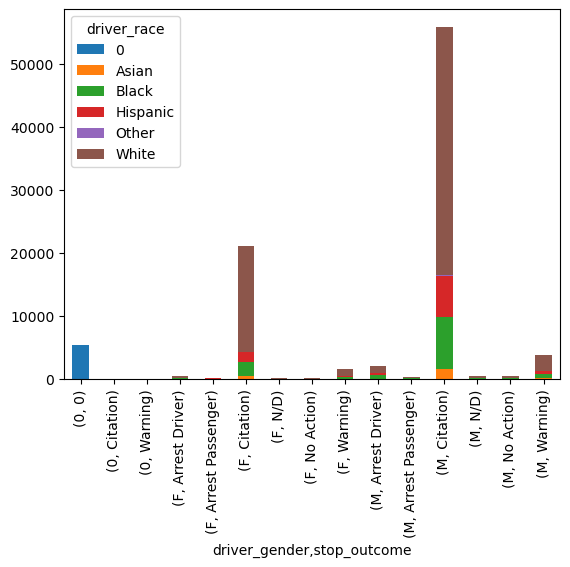

In [43]:
most_common_outcome = data.groupby(['driver_gender', 'stop_outcome', 'driver_race' ]).size().unstack().fillna(0)
most_common_outcome.plot(kind='bar', stacked=True)

91741


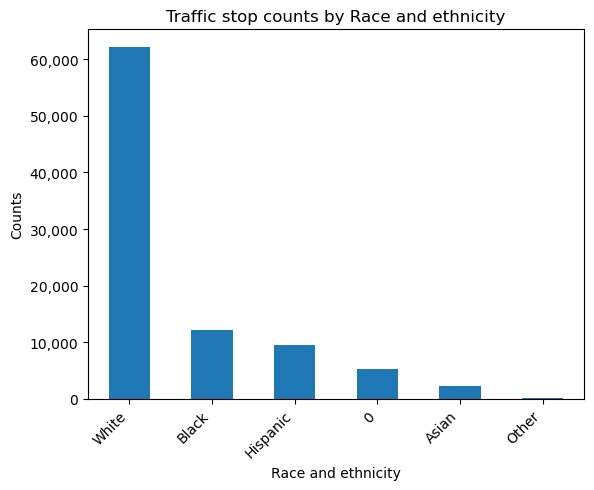

In [44]:
ethnic_groups = data['driver_race'].value_counts()
print(ethnic_groups.sum())
ethnic_groups


# Create a stacked bar plot
ethnic_groups.plot(kind='bar',  stacked=False)
plt.xlabel('Race and ethnicity')
plt.ylabel('Counts')
plt.title('Traffic stop counts by Race and ethnicity')
plt.xticks(rotation=45, ha='right')
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
# plt.gca().set_xticklabels(['Other', 'Female', 'Male'])
# plt.legend(labels)
plt.show()

/tmp/ipykernel_32/1200493057.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


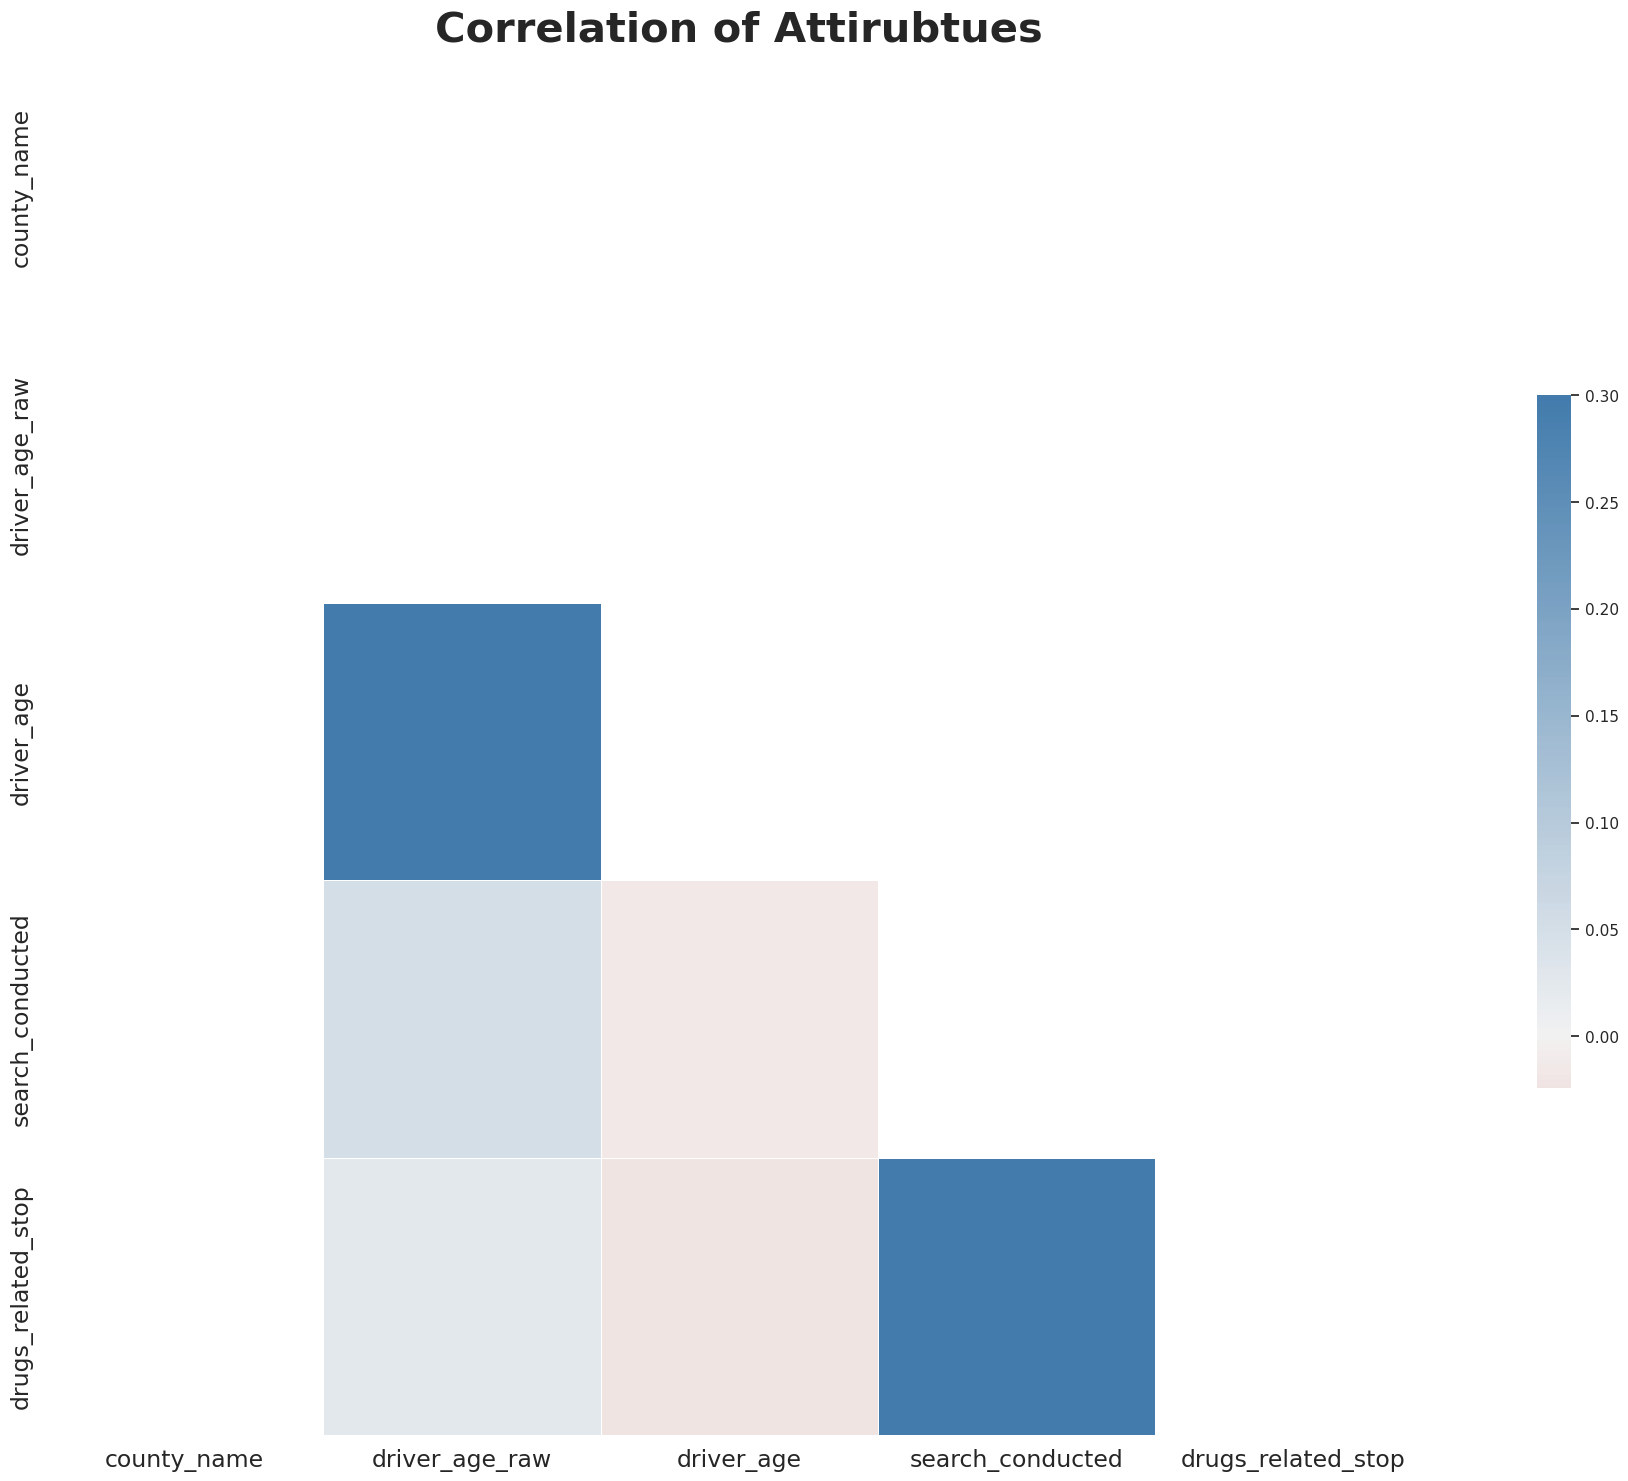

In [47]:
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(15,963 ,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues",fontsize=30,fontweight='bold')
ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)